In [3]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob

In [4]:
#get in list of files

path = r'G:\Multi Managers\Fixed Income Style Reporting\INPUT\*\*\Funds\*.xlsx'

files = glob.glob(path)

files[:2]

['G:\\Multi Managers\\Fixed Income Style Reporting\\INPUT\\2017\\05 17\\Funds\\B016J21_052017.xlsx',
 'G:\\Multi Managers\\Fixed Income Style Reporting\\INPUT\\2017\\05 17\\Funds\\B0V9T86_052017.xlsx']

**Table with fund names and identifiers**

In [5]:
path1 = 'G:\\Multi Managers\\Fixed Income Style Reporting\\Fixed Income Data Log 2018 04.xlsx'
names = pd.read_excel(path1, sheet_name=0, index_col=1, skiprows=2)
names

,Investment House,Sedol,2018-04-01 00:00:00,Contact 1,Contact 2,Unnamed: 6,Unnamed: 7,Previous Sedol
Fund,,,,,,,,
Aberdeen Global High Yield Fund,Aberdeen,BWK2634,NaN,David Thorn,Business Systems Development <Business.Systems...,Fund OC9900,NaN,NaN
Aberdeen Corporate Bond Fund Q Net Inc,Aberdeen,BWK26M3,NaN,NaN,Jamie Irvine <Jamie.Irvine@aberdeen-asset.com>,Fund B005396,NaN,NaN
Aberdeen Sterling Opportunistic Corporate Bond,Aberdeen,BWK27P3,NaN,NaN,Jamie Irvine <Jamie.Irvine@aberdeen-asset.com>,Class P Inc,NaN,NaN
Aberdeen Global II Sterling Government Bond,Aberdeen,BWK26V2,NaN,NaN,Jamie Irvine <Jamie.Irvine@aberdeen-asset.com>,NaN,NaN,NaN
Aberdeen Sterling Index Linked Bond,Aberdeen,BWK2731,NaN,NaN,Jamie Irvine <Jamie.Irvine@aberdeen-asset.com>,NaN,NaN,NaN
Allianz Euro Investment Grade Bond Fund,Allianz,BD82QB1,NaN,Matthew.Couzens@AllianzGI.com,Natalie.Goodman@allianzgi.co.uk,NaN,NaN,NaN
AXA Global Inflation Linked Bond Fund,AXA,9125485,NaN,Matthew.STINCHCOMBE@axa-im.com,Lonclientservices@axa-im.com,NaN,NaN,NaN
BlackRock Corporate Bond Tracker H,BlackRock,BKF2KH7,NaN,NO DATA REQUIRED,JN happy to proxy this fund using the Iboxx £ ...,NaN,NaN,NaN
BlackRock UK Gilt All Stocks,BlackRock,BPFJDF2,NaN,Nick.hutton@blackrock.com,edmund.arrowsmith@blackrock.com,NaN,NaN,NaN


In [51]:
#copy required fund name into brackets

sedol = names.Sedol.loc['Pimco Global Investment Grade Credit'] # copy fund name in here
sedol

'B3BMD84'

In [52]:
#get name

name = str(names[names['Sedol']==sedol].index.values)[2:-2]
name

'Pimco Global Investment Grade Credit'

In [53]:
#create list of dates

dates = pd.date_range('5/1/2017', periods=12, freq='M')
dates

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30'],
              dtype='datetime64[ns]', freq='M')

**Interest rate exposures by contribution to effective duration**

In [54]:
#read in files

def read_in_files_rates(lst, sheet_name):
    totals = []
    for i in lst:
        if sedol in i:
            xls = pd.ExcelFile(i)
            f = pd.read_excel(xls, sheet_name, index_col=1, skiprows=3)
            del f['Unnamed: 0']
            ft = f.T.sum()
            totals.append(ft)
            appended_data = pd.concat(totals, axis=1)
            df = appended_data.drop('Total', axis=0)
    return appended_data

In [55]:
res_rates = read_in_files_rates(files,'IR Exposures')
res_rates.columns = dates[:12]
res_rates = res_rates[2:-3]
res_rates=res_rates.fillna(0)
res_rates

,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00
Australasia,0.222055,0.21,0.206029,0.201361,0.23,0.224265,0.219512,0.208515,0.212195,0.206731,0.209089,0.212303
EURO - Core*,0.899270,0.85,0.857972,0.852464,0.83,0.815074,0.850515,0.867953,0.947302,0.847237,0.945329,1.046328
EURO - Periphery,0.392221,0.36,0.367931,0.354036,0.35,0.335836,0.358966,0.325441,0.328896,0.319072,0.328998,0.393704
Emerging Markets**,0.416366,0.36,0.303106,0.301758,0.42,0.472343,0.585593,0.579329,0.618546,0.658977,0.678869,0.683000
GBP,0.381771,0.38,0.392050,0.433267,0.42,0.409468,0.417851,0.277583,0.300603,0.272416,0.249208,0.262106
JPY,-0.091361,-0.09,-0.086213,-0.086902,-0.10,-0.077395,-0.172508,-0.266577,-0.273928,-0.282563,-0.276431,-0.108094
Other,0.330217,0.31,0.327737,0.332083,0.36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Tidy up table if required - Pimco funds will need this**

In [ ]:
# tweak as required

def tidy_up(lst):
    #lst.loc['Other'] = lst.loc['Other'] + lst.loc['Others']
    #lst = lst.drop('Others', axis=0)
    lst = lst.drop(lst.index[-2:], axis=0)
    return lst

In [ ]:
res_rates2 = tidy_up(res_rates)
res_rates2

In [56]:
#res_rates2.columns = dates
res_rates3 = res_rates.T #change to res_rates2 if tidy up function used
res_rates3 = res_rates3.replace(0, res_rates3.mean()) # fix for Aberdeen
res_rates3

,Australasia,EURO - Core*,EURO - Periphery,Emerging Markets**,GBP,JPY,Other
2017-05-31,0.222055,0.899270,0.392221,0.416366,0.381771,-0.091361,0.330217
2017-06-30,0.210000,0.850000,0.360000,0.360000,0.380000,-0.090000,0.310000
2017-07-31,0.206029,0.857972,0.367931,0.303106,0.392050,-0.086213,0.327737
2017-08-31,0.201361,0.852464,0.354036,0.301758,0.433267,-0.086902,0.332083
2017-09-30,0.230000,0.830000,0.350000,0.420000,0.420000,-0.100000,0.360000
2017-10-31,0.224265,0.815074,0.335836,0.472343,0.409468,-0.077395,0.138336
2017-11-30,0.219512,0.850515,0.358966,0.585593,0.417851,-0.172508,0.138336
2017-12-31,0.208515,0.867953,0.325441,0.579329,0.277583,-0.266577,0.138336
2018-01-31,0.212195,0.947302,0.328896,0.618546,0.300603,-0.273928,0.138336
2018-02-28,0.206731,0.847237,0.319072,0.658977,0.272416,-0.282563,0.138336


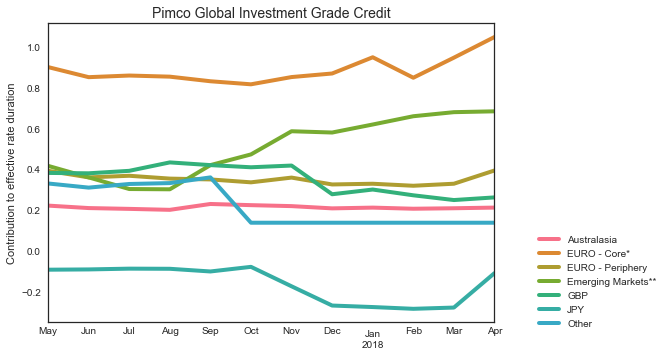

In [58]:
sns.set_style('white')

color = sns.color_palette("husl", 10)
#color= ['navy', 'mediumvioletred', 'slateblue', 'seagreen', 'gold', 'lime']

res_rates3.plot(color=color, linewidth=4)
plt.ylabel('Contribution to effective rate duration')
plt.legend(loc='lower left', bbox_to_anchor=(1.08, -0.05))
plt.title(name, fontsize=14)

**Save figure to drive**

*change file name*

In [ ]:
plt.savefig('PimcoIGCredit_IR_Exp_0518.png', bbox_inches='tight')

**Credit exposures per rating quality**

In [59]:
def read_in_files_credit(lst, sheet_name):
    totals = []
    for i in lst:
        if sedol in i:
            xls = pd.ExcelFile(i)
            f = pd.read_excel(xls, sheet_name, index_col=2, skiprows=3)
            ff = f.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)  
            ft = ff.T.sum()
            totals.append(ft)
            appended_data = pd.concat(totals, axis=1)
            #df = appended_data.drop(['Rating', 'Total'], axis=0)
    return appended_data

In [73]:
res_credit = read_in_files_credit(files,'Credit Exposures 1')
#res_credit = res_credit.fillna(0)[:-2]
res_credit.columns = dates[:12]
res_credit

,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00
A,NaN,NaN,NaN,NaN,NaN,0.832678,1.02473,1.23872,1.31384,1.22622,1.30772,1.55146
AA,NaN,NaN,NaN,NaN,NaN,0.180498,0.17171,0.0905882,0.112036,0.107724,0.0887866,0.110748
AAA,NaN,NaN,NaN,NaN,NaN,-0.135244,-0.0666198,0.0654743,0.0892599,0.0898609,0.0877262,0.101229
B,NaN,NaN,NaN,NaN,NaN,0.20634,0.172994,0.170348,0.16579,0.168119,0.186291,0.177939
BB,NaN,NaN,NaN,NaN,NaN,0.483941,0.554309,0.517675,0.507579,0.477843,0.416885,0.444344
BBB,NaN,NaN,NaN,NaN,NaN,2.73176,2.38267,1.96445,2.0713,2.04684,2.14172,2.2053
C,NaN,NaN,NaN,NaN,NaN,0.00204742,0.000278541,0.000297683,0.00024222,1.57816e-07,1.535e-07,1.2498e-07
CC,NaN,NaN,NaN,NaN,NaN,0.0128995,0.00837903,0.00826989,0.00850207,0.00853808,0.00820708,0.00812373
CCC,NaN,NaN,NaN,NaN,NaN,0.0227874,0.0148694,0.0141292,0.0123937,0.0123576,0.0124607,0.00953687
Not Rated,NaN,NaN,NaN,NaN,NaN,-0.23936,-0.202146,-0.175699,-0.0709436,-0.0720529,-0.0724761,-0.208957


In [77]:

res_credit3= res_credit.iloc[:-1,5:].T #change to res_rates2 if tidy up function used
res_credit3

,A,AA,AAA,B,BB,BBB,C,CC,CCC,Not Rated,Rating
2017-10-31,0.832678,0.180498,-0.135244,0.20634,0.483941,2.73176,0.00204742,0.0128995,0.0227874,-0.23936,0 to 22 to 55 to 77 to 1010 to 1515+
2017-11-30,1.02473,0.17171,-0.0666198,0.172994,0.554309,2.38267,0.000278541,0.00837903,0.0148694,-0.202146,0 to 22 to 55 to 77 to 1010 to 1515+
2017-12-31,1.23872,0.0905882,0.0654743,0.170348,0.517675,1.96445,0.000297683,0.00826989,0.0141292,-0.175699,0 to 22 to 55 to 77 to 1010 to 1515+
2018-01-31,1.31384,0.112036,0.0892599,0.16579,0.507579,2.0713,0.00024222,0.00850207,0.0123937,-0.0709436,0 to 22 to 55 to 77 to 1010 to 1515+
2018-02-28,1.22622,0.107724,0.0898609,0.168119,0.477843,2.04684,1.57816e-07,0.00853808,0.0123576,-0.0720529,0 to 22 to 55 to 77 to 1010 to 1515+
2018-03-31,1.30772,0.0887866,0.0877262,0.186291,0.416885,2.14172,1.535e-07,0.00820708,0.0124607,-0.0724761,0 to 22 to 55 to 77 to 1010 to 1515+
2018-04-30,1.55146,0.110748,0.101229,0.177939,0.444344,2.2053,1.2498e-07,0.00812373,0.00953687,-0.208957,0 to 22 to 55 to 77 to 1010 to 1515+


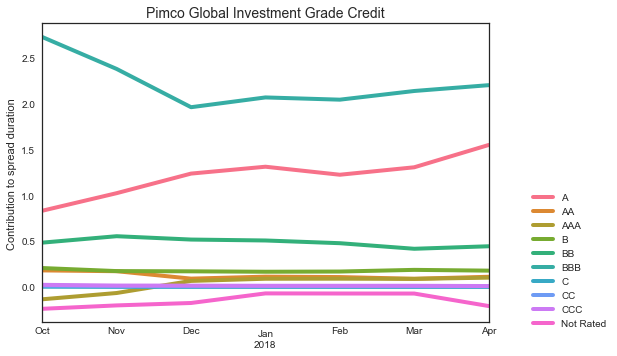

In [80]:
sns.set_style('white')

color = sns.color_palette("husl", 10)
#color= ['navy', 'mediumvioletred', 'slateblue', 'seagreen', 'gold', 'lime']

res_credit3.plot(color=color, linewidth=4)
plt.ylabel('Contribution to spread duration')
plt.legend(loc='lower left', bbox_to_anchor=(1.08, -0.05))
plt.title(name, fontsize=14)
plt.savefig('PimcoIGCredit_rating_Exp_0518.png', bbox_inches='tight')

**Save figure**

*change name*

**Credit exposure per fixed income subsector**

In [33]:
def read_in_files_credit_2(lst, sheet_name):
    totals = []
    for i in lst:
        if sedol in i:
            xls = pd.ExcelFile(i)
            f = pd.read_excel(xls, sheet_name, index_col=2, skiprows=4)
            ff = f.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)         
            ft = ff.T.sum()
            totals.append(ft)
            appended_data = pd.concat(totals, axis=1)
    return appended_data.drop(['* Germany + France', 'Asset Class', 'Total'])

In [34]:
res_credit_2 = read_in_files_credit_2(files,'Credit Exposures 2')
res_credit_2 = res_credit_2.fillna(0)
res_credit_2.columns = dates[:12]
res_credit_2

,2017-05-31 00:00:00,2017-06-30 00:00:00,2017-07-31 00:00:00,2017-08-31 00:00:00,2017-09-30 00:00:00,2017-10-31 00:00:00,2017-11-30 00:00:00,2017-12-31 00:00:00,2018-01-31 00:00:00,2018-02-28 00:00:00,2018-03-31 00:00:00,2018-04-30 00:00:00
** Including hard and local,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ABS/securitized,0.295221,0.27,0.260223,0.252045,0.25,0.248505,0.248646,0.242746,0.250188,0.246480,0.455395,0.454067
EMD Hard,0.422410,0.41,0.400556,0.396703,0.53,0.533293,0.595927,0.575210,0.630849,0.621226,0.629916,0.652021
EMD Local,0.291468,0.22,0.181602,0.179938,0.22,0.249394,0.373507,0.367775,0.354782,0.398837,0.413855,0.446494
High Yield,0.507996,0.44,0.430561,0.454265,0.42,0.415809,0.413435,0.344994,0.366166,0.347052,0.360771,0.393207
IG Financials,1.276525,1.22,1.274006,1.258797,1.26,1.223108,1.269347,1.200034,1.252521,1.207762,1.216493,1.307577
IG Non Financials,1.485170,1.49,1.525084,1.575108,1.61,1.560649,1.457791,1.336957,1.341914,1.200851,1.264748,1.278842
Loans,0.058856,0.07,0.076342,0.078991,0.08,0.071397,0.074961,0.066951,0.054487,0.064005,0.062820,0.057731
Others,-0.421289,-0.40,-0.281504,-0.274592,-0.27,-0.203811,-0.372438,-0.240414,-0.040904,-0.020759,-0.226679,-0.190214


In [81]:
res_credit_2_v1 = res_credit_2.iloc[1:,1:].T
res_credit_2_v1

,ABS/securitized,EMD Hard,EMD Local,High Yield,IG Financials,IG Non Financials,Loans,Others
2017-06-30,0.270000,0.410000,0.220000,0.440000,1.220000,1.490000,0.070000,-0.400000
2017-07-31,0.260223,0.400556,0.181602,0.430561,1.274006,1.525084,0.076342,-0.281504
2017-08-31,0.252045,0.396703,0.179938,0.454265,1.258797,1.575108,0.078991,-0.274592
2017-09-30,0.250000,0.530000,0.220000,0.420000,1.260000,1.610000,0.080000,-0.270000
2017-10-31,0.248505,0.533293,0.249394,0.415809,1.223108,1.560649,0.071397,-0.203811
2017-11-30,0.248646,0.595927,0.373507,0.413435,1.269347,1.457791,0.074961,-0.372438
2017-12-31,0.242746,0.575210,0.367775,0.344994,1.200034,1.336957,0.066951,-0.240414
2018-01-31,0.250188,0.630849,0.354782,0.366166,1.252521,1.341914,0.054487,-0.040904
2018-02-28,0.246480,0.621226,0.398837,0.347052,1.207762,1.200851,0.064005,-0.020759
2018-03-31,0.455395,0.629916,0.413855,0.360771,1.216493,1.264748,0.062820,-0.226679


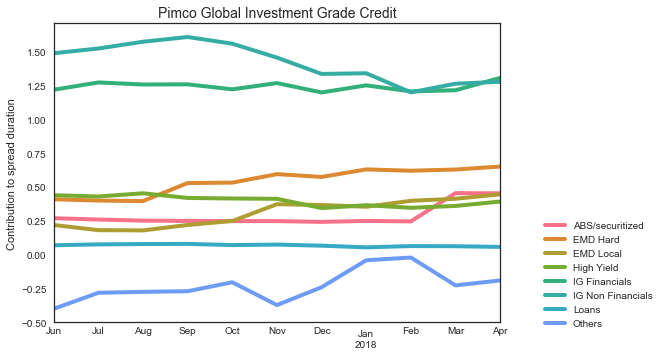

In [84]:
sns.set_style('white')

color = sns.color_palette("husl",10)
#color= ['navy', 'mediumvioletred', 'slateblue', 'seagreen', 'gold', 'lime']

res_credit_2_v1.plot(color=color,  linewidth=4)
plt.ylabel('Contribution to spread duration')
plt.legend(loc='lower left', bbox_to_anchor=(1.08, -0.05))
plt.title(name, fontsize=14)
plt.savefig('PimcoIGCredit_Exp_bytype_0518.png', bbox_inches='tight')